# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne



Put together the pieces

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [208]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [209]:
intputtablefile1='HD163466_grating_1-25_TablePSF.fits'

In [210]:
 t1 = Table.read(intputtablefile1)

In [211]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str31,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD163466_grating_1.fits,2016-05-12T07:44:43.031,5.0,64,3.27269668874,3.88553341132,0.255804340104,0.630429467266
1,AssScImHD163466_grating_2.fits,2016-05-12T07:45:25.729,5.0,77,3.23553358593,3.68556328674,0.257597799449,0.710772994991
2,AssScImHD163466_grating_3.fits,2016-05-12T07:45:39.969,5.0,62,3.32012000341,3.75058997275,0.349992606517,0.639362413853
3,AssScImHD163466_grating_4.fits,2016-05-12T07:45:53.737,5.0,52,3.40832433709,3.94203727252,0.278009048375,0.638777321358
4,AssScImHD163466_grating_5.fits,2016-05-12T07:46:08.135,5.0,58,3.31063509983,3.74642615098,0.223678199732,0.655809560281
5,AssScImHD163466_grating_6.fits,2016-05-12T07:46:21.770,5.0,37,3.41812953386,3.80001190974,0.122160814787,0.498240852554
6,AssScImHD163466_grating_7.fits,2016-05-12T07:47:45.901,5.0,27,3.26659530388,3.90464523342,0.127364793996,0.506540068331
7,AssScImHD163466_grating_8.fits,2016-05-12T07:47:54.975,5.0,35,3.39261307653,3.96786115165,0.274179753652,0.516360179579
8,AssScImHD163466_grating_9.fits,2016-05-12T07:48:04.034,5.0,44,3.19352421633,3.71210090293,0.207016221129,0.591840708818


In [212]:
df1=t1.to_pandas()

In [213]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,3.4,31.960000,3.380461,3.818436,0.162651,0.408679
std,7.359801,2.0,20.210311,0.113820,0.103179,0.096924,0.226536
min,0.000000,1.0,9.000000,3.193524,3.642986,0.048746,0.109130
25%,6.000000,1.0,12.000000,3.298594,3.746426,0.073465,0.149382
50%,12.000000,5.0,35.000000,3.387251,3.813110,0.132763,0.506540
75%,18.000000,5.0,42.000000,3.448174,3.904645,0.255804,0.596840
max,24.000000,5.0,77.000000,3.654467,3.982965,0.349993,0.710773


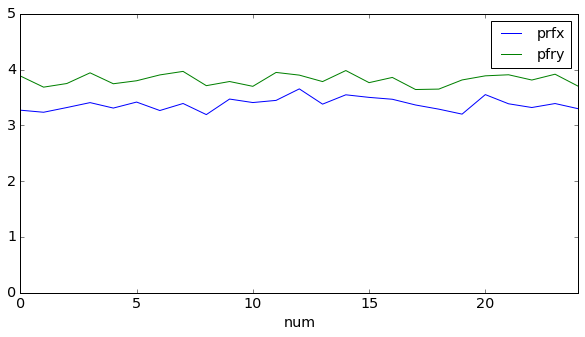

In [214]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [215]:
intputtablefile2='HD158485_grat_1-50_TablePSF.fits'

In [216]:
t2 = Table.read(intputtablefile2)

In [217]:
df2=t2.to_pandas()

In [218]:
df2.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,50.00000,50.000000,50.000000,45.000000,48.000000,45.000000,48.000000
mean,24.50000,3.372000,18.980000,3.333004,3.510633,0.260939,0.432202
std,14.57738,2.108877,15.938005,0.378728,0.302113,0.199223,0.318711
min,0.00000,0.400000,1.000000,2.866824,3.019007,0.000000,0.000000
25%,12.25000,1.000000,7.000000,NaN,NaN,NaN,NaN
50%,24.50000,5.000000,13.000000,NaN,NaN,NaN,NaN
75%,36.75000,5.000000,28.500000,NaN,NaN,NaN,NaN
max,49.00000,5.000000,56.000000,4.474156,4.623810,0.837820,0.912355


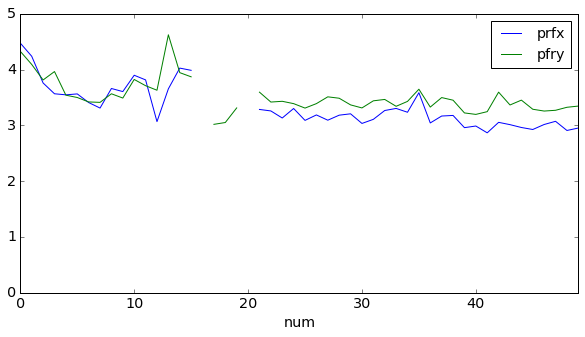

In [219]:
plt.figure(figsize=(10,6))
df2_2=df2[['num', 'prfx','pfry']]
df2_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [220]:
df2_no_missing = df2.dropna()

In [221]:
df2_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,25.222222,3.191111,20.844444,3.333004,3.536146,0.260939,0.461015
std,15.201508,2.148977,15.723398,0.378728,0.292681,0.199223,0.308086
min,0.000000,0.400000,1.000000,2.866824,3.197155,0.000000,0.000000
25%,11.000000,1.000000,8.000000,3.054724,3.346323,0.157338,0.150688
50%,27.000000,5.000000,15.000000,3.207648,3.451709,0.222837,0.428237
75%,38.000000,5.000000,33.000000,3.566803,3.595877,0.279615,0.769873
max,49.000000,5.000000,56.000000,4.474156,4.623810,0.837820,0.912355


In [222]:
intputtablefile3='HD158485_grat_51-100_TablePSF.fits'

In [223]:
t3 = Table.read(intputtablefile3)

In [224]:
df3=t3.to_pandas()

In [225]:
df3.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.48000,26.400000,3.029724,3.592927,0.228702,0.413208
std,14.57738,2.09021,17.314616,0.148261,0.132934,0.111798,0.285283
min,0.00000,0.40000,5.000000,2.704380,3.281386,0.108625,0.058110
25%,12.25000,1.00000,13.250000,2.937760,3.522611,0.169668,0.178102
50%,24.50000,1.00000,19.000000,3.038586,3.575247,0.197276,0.230499
75%,36.75000,5.00000,43.750000,3.118689,3.679681,0.243171,0.698741
max,49.00000,5.00000,69.000000,3.373055,3.968515,0.669269,0.863951


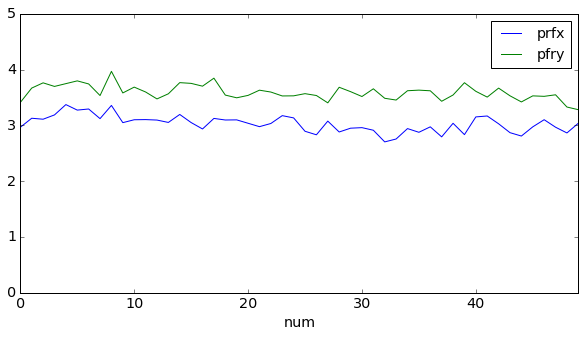

In [226]:
df3_2=df3[['num', 'prfx','pfry']]
df3_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [227]:
intputtablefile4='HD158485_grat_103-132_TablePSF.fits'

In [228]:
t4 = Table.read(intputtablefile4)

In [229]:
df4=t4.to_pandas()

In [230]:
df4.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,2.133333,23.600000,3.293882,3.241749,0.317081,0.454643
std,8.803408,2.076691,17.621695,0.333514,0.151522,0.268937,0.357247
min,0.000000,0.400000,4.000000,2.982135,2.978183,0.106278,0.070986
25%,7.250000,0.400000,10.000000,3.115525,3.175703,0.200440,0.136120
50%,14.500000,1.000000,15.500000,3.243751,3.219538,0.227856,0.291260
75%,21.750000,5.000000,46.250000,3.348283,3.290000,0.268977,0.853948
max,29.000000,5.000000,53.000000,4.825302,3.686235,1.307125,1.066353


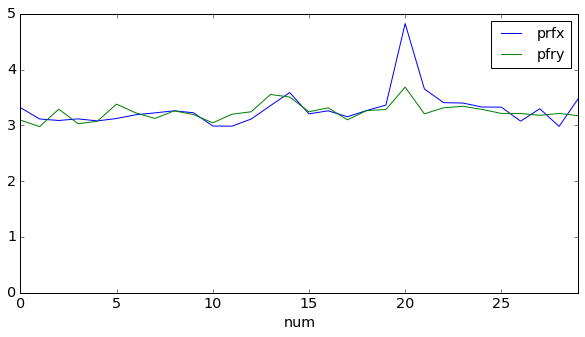

In [231]:
df4_2=df4[['num', 'prfx','pfry']]
df4_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [232]:
df4

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,0,AssScImHD158485_grat_103.fits,2016-05-12T10:29:12.303,5.0,47,3.320384,3.096624,0.236072,1.045591
1,1,AssScImHD158485_grat_104.fits,2016-05-12T10:29:21.641,5.0,44,3.114921,2.978183,0.210843,0.826591
2,2,AssScImHD158485_grat_105.fits,2016-05-12T10:29:30.676,5.0,47,3.088157,3.291178,0.250620,0.864441
3,3,AssScImHD158485_grat_106.fits,2016-05-12T10:29:39.729,5.0,50,3.117337,3.029542,0.246160,1.066353
4,4,AssScImHD158485_grat_107.fits,2016-05-12T10:29:48.819,5.0,48,3.080296,3.074351,0.241539,0.854842
5,5,AssScImHD158485_grat_108.fits,2016-05-12T10:29:57.821,5.0,47,3.123903,3.381563,0.356746,0.890954
6,6,AssScImHD158485_grat_109.fits,2016-05-12T10:30:06.868,5.0,48,3.190583,3.224209,0.263373,0.939723
7,7,AssScImHD158485_grat_110.fits,2016-05-12T10:30:15.970,5.0,47,3.224516,3.124866,0.227635,0.988244
8,8,AssScImHD158485_grat_111.fits,2016-05-12T10:30:24.969,5.0,53,3.261385,3.260572,0.228077,0.851268
9,9,AssScImHD158485_grat_112.fits,2016-05-12T10:30:33.946,5.0,40,3.226377,3.194528,0.270845,0.924360


In [233]:
intputtablefile5='HD158485_grat_1-101_TablePSF.fits'

In [234]:
t5 = Table.read(intputtablefile5)

In [235]:
df5=t5.to_pandas()

In [236]:
df5_no_missing = df5.dropna()

In [237]:
df5_no_missing.describe() 

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,51.666667,2.791667,23.593750,3.171685,3.563113,0.251827,0.432446
std,29.101154,2.139929,16.726014,0.317771,0.224524,0.176101,0.296014
min,0.000000,0.400000,1.000000,2.704380,3.197155,0.000000,0.000000
25%,28.750000,1.000000,9.000000,2.972412,3.420558,0.166300,0.169637
50%,52.500000,1.000000,17.500000,3.096243,3.532747,0.204856,0.351551
75%,76.250000,5.000000,42.000000,3.261123,3.659034,0.259524,0.739566
max,100.000000,5.000000,69.000000,4.474156,4.623810,0.998030,0.912355


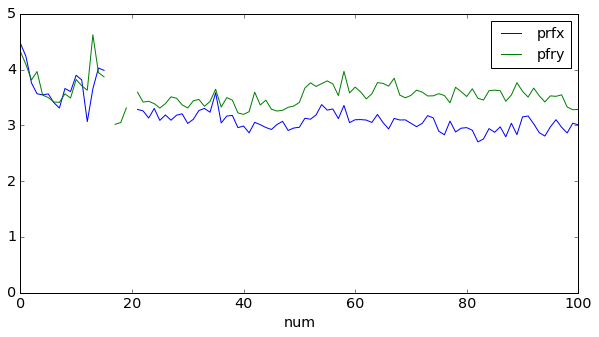

In [238]:
df5_2=df5[['num', 'prfx','pfry']]
df5_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [239]:
df4

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,0,AssScImHD158485_grat_103.fits,2016-05-12T10:29:12.303,5.0,47,3.320384,3.096624,0.236072,1.045591
1,1,AssScImHD158485_grat_104.fits,2016-05-12T10:29:21.641,5.0,44,3.114921,2.978183,0.210843,0.826591
2,2,AssScImHD158485_grat_105.fits,2016-05-12T10:29:30.676,5.0,47,3.088157,3.291178,0.250620,0.864441
3,3,AssScImHD158485_grat_106.fits,2016-05-12T10:29:39.729,5.0,50,3.117337,3.029542,0.246160,1.066353
4,4,AssScImHD158485_grat_107.fits,2016-05-12T10:29:48.819,5.0,48,3.080296,3.074351,0.241539,0.854842
5,5,AssScImHD158485_grat_108.fits,2016-05-12T10:29:57.821,5.0,47,3.123903,3.381563,0.356746,0.890954
6,6,AssScImHD158485_grat_109.fits,2016-05-12T10:30:06.868,5.0,48,3.190583,3.224209,0.263373,0.939723
7,7,AssScImHD158485_grat_110.fits,2016-05-12T10:30:15.970,5.0,47,3.224516,3.124866,0.227635,0.988244
8,8,AssScImHD158485_grat_111.fits,2016-05-12T10:30:24.969,5.0,53,3.261385,3.260572,0.228077,0.851268
9,9,AssScImHD158485_grat_112.fits,2016-05-12T10:30:33.946,5.0,40,3.226377,3.194528,0.270845,0.924360


## Now use the number in the filename to overwrite the num

In [240]:
import re  # use regular expression to extract the file number

In [241]:
filenames_df4=df4['file']

In [242]:
NB_OF_FILES_df4=len(filenames_df4)

In [243]:
filenumber_df4=np.zeros(NB_OF_FILES_df4,dtype='i4')

In [244]:
for id,file in enumerate(filenames_df4):
    filenumber_df4[id]=int( re.findall('^AssScImHD158485_grat_([0-9]+)',file)[0])

In [245]:
filenumber_df4

array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132], dtype=int32)

In [246]:
df4_3=df4

In [247]:
df4_3['num']=filenumber_df4

In [248]:
df4_3

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,103,AssScImHD158485_grat_103.fits,2016-05-12T10:29:12.303,5.0,47,3.320384,3.096624,0.236072,1.045591
1,104,AssScImHD158485_grat_104.fits,2016-05-12T10:29:21.641,5.0,44,3.114921,2.978183,0.210843,0.826591
2,105,AssScImHD158485_grat_105.fits,2016-05-12T10:29:30.676,5.0,47,3.088157,3.291178,0.250620,0.864441
3,106,AssScImHD158485_grat_106.fits,2016-05-12T10:29:39.729,5.0,50,3.117337,3.029542,0.246160,1.066353
4,107,AssScImHD158485_grat_107.fits,2016-05-12T10:29:48.819,5.0,48,3.080296,3.074351,0.241539,0.854842
5,108,AssScImHD158485_grat_108.fits,2016-05-12T10:29:57.821,5.0,47,3.123903,3.381563,0.356746,0.890954
6,109,AssScImHD158485_grat_109.fits,2016-05-12T10:30:06.868,5.0,48,3.190583,3.224209,0.263373,0.939723
7,110,AssScImHD158485_grat_110.fits,2016-05-12T10:30:15.970,5.0,47,3.224516,3.124866,0.227635,0.988244
8,111,AssScImHD158485_grat_111.fits,2016-05-12T10:30:24.969,5.0,53,3.261385,3.260572,0.228077,0.851268
9,112,AssScImHD158485_grat_112.fits,2016-05-12T10:30:33.946,5.0,40,3.226377,3.194528,0.270845,0.924360


In [249]:
filenames_df5=df5['file']  # get the column file from the pandas dataset

In [250]:
NB_OF_FILES_df5=len(filenames_df5) # number of files

In [251]:
filenumber_df5=np.zeros(NB_OF_FILES_df5,dtype='i4')  # need to create an integer array

In [252]:
# use regular expression to extract the file number
for id,file in enumerate(filenames_df5):
    filenumber_df5[id]=int( re.findall('^AssScImHD158485_grat_([0-9]+)',file)[0])

In [253]:
filenumber_df5

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=int32)

In [254]:
df5_3=df5    # copy df5 into df5_3

In [255]:
df5_3['num']=filenumber_df5 # overwrite with the new numbers

In [256]:
full_dataset=pd.concat([df5_3,df4_3])

In [257]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.474156,4.326469,0.000000,0.000000
1,2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.239159,4.092487,0.392718,0.184644
2,3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.760207,3.814321,0.235852,0.767497
3,4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.566803,3.964831,0.181167,0.648767
4,5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.547807,3.541829,0.394433,0.769873
5,6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.564433,3.499845,0.199997,0.776634
6,7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.409864,3.420511,0.214400,0.742010
7,8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.310829,3.412781,0.287049,0.315149
8,9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.661300,3.566581,0.372296,0.601672
9,10,AssScImHD158485_grat_10.fits,2016-05-12T04:11:23.668,5.0,14,3.606130,3.490054,0.192595,0.801258


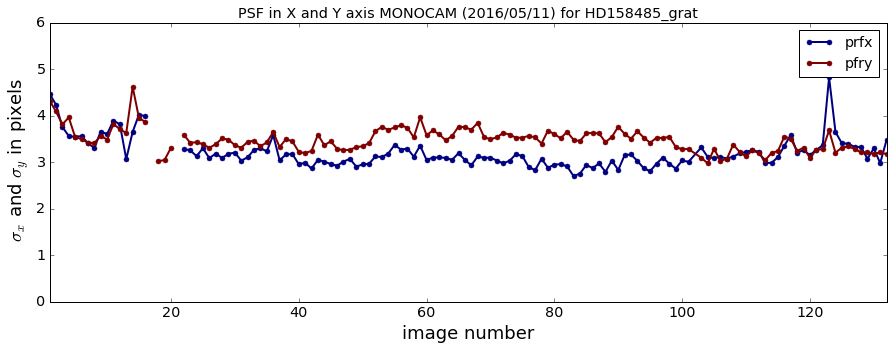

In [258]:
fig = plt.figure()
full_dataset_2=full_dataset[['num', 'prfx','pfry']]
ax=full_dataset_2.plot('num',['prfx','pfry'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in pixels",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
fig.savefig('PRFXY_HD158485_grat_20160511.png',bbox_inches='tight')
#plt.show()  # pandas able to remove NaN

plt.close(fig)

In [259]:
PixToArcsec=0.944

In [260]:
sigmax=full_dataset['prfx']*PixToArcsec

In [261]:
series_sigmax=pd.Series(sigmax)

In [262]:
sigmay=full_dataset['pfry']*PixToArcsec

In [263]:
series_sigmay=pd.Series(sigmay)

In [264]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.474156,4.326469,0.000000,0.000000
1,2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.239159,4.092487,0.392718,0.184644
2,3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.760207,3.814321,0.235852,0.767497
3,4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.566803,3.964831,0.181167,0.648767
4,5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.547807,3.541829,0.394433,0.769873
5,6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.564433,3.499845,0.199997,0.776634
6,7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.409864,3.420511,0.214400,0.742010
7,8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.310829,3.412781,0.287049,0.315149
8,9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.661300,3.566581,0.372296,0.601672
9,10,AssScImHD158485_grat_10.fits,2016-05-12T04:11:23.668,5.0,14,3.606130,3.490054,0.192595,0.801258


### simply add series as columns in the dataset

In [265]:
full_dataset['sigmax'] = series_sigmax

In [266]:
full_dataset['sigmay'] = series_sigmay

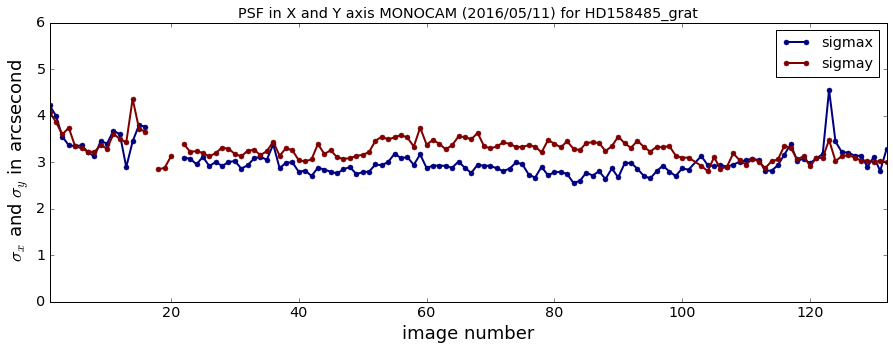

In [267]:
fig = plt.figure(figsize=(15,6))
full_dataset_3=full_dataset[['num', 'sigmax','sigmay']]
ax=full_dataset_3.plot('num',['sigmax','sigmay'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in arcsecond",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
fig.savefig('PSFXY_HD158485_grat_20160511.png',bbox_inches='tight')
#plt.show()  # pandas able to remove NaN
plt.close(fig)

In [268]:
prfx=3.096243
prfy=3.532747

eprfx=0.204856
eprfy=0.351551

psfx=prfx*PixToArcsec
psfy=prfy*PixToArcsec

epsfx=eprfx*PixToArcsec
epsfy=eprfy*PixToArcsec


print 'best prf : prfx = {:2.2f} +/- {:2.2f} pixels,   prfy = {:2.2f} +/- {:2.2f} pixels'.format(prfx,eprfx,prfy,eprfy)
print 'best psf : psfx = {:2.2f} +/- {:2.2f} arcsec,   psfy = {:2.2f} +/- {:2.2f} arcsec'.format(psfx,epsfx,psfy,epsfy)

best prf : prfx = 3.10 +/- 0.20 pixels,   prfy = 3.53 +/- 0.35 pixels
best psf : psfx = 2.92 +/- 0.19 arcsec,   psfy = 3.33 +/- 0.33 arcsec


In [269]:
output_table=Table.from_pandas(full_dataset)

In [270]:
output_table

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str29,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD158485_grat_1.fits,2016-05-12T04:08:27.322,5.0,1,4.47415632464,4.32646900741,0.0,0.0,4.22360357046,4.08418674299
2,AssScImHD158485_grat_2.fits,2016-05-12T04:10:10.602,5.0,5,4.23915877347,4.09248732084,0.392718231946,0.18464392513,4.00176588215,3.86330803087
3,AssScImHD158485_grat_3.fits,2016-05-12T04:10:20.458,5.0,21,3.76020655028,3.81432116694,0.235852244067,0.767497075115,3.54963498347,3.60071918159
4,AssScImHD158485_grat_4.fits,2016-05-12T04:10:29.432,5.0,21,3.56680321661,3.96483104307,0.181167115677,0.648766625551,3.36706223648,3.74280050466
5,AssScImHD158485_grat_5.fits,2016-05-12T04:10:38.586,5.0,10,3.54780685321,3.54182907249,0.394432864272,0.769873402452,3.34912966943,3.34348664443
6,AssScImHD158485_grat_6.fits,2016-05-12T04:10:47.541,5.0,23,3.5644327671,3.49984527018,0.199997271512,0.77663355496,3.36482453215,3.30385393505
7,AssScImHD158485_grat_7.fits,2016-05-12T04:10:56.526,5.0,33,3.40986449559,3.42051094206,0.21440035444,0.74200994629,3.21891208384,3.2289623293
8,AssScImHD158485_grat_8.fits,2016-05-12T04:11:05.546,5.0,15,3.31082909982,3.41278053444,0.287048747871,0.315149038754,3.12542267023,3.22166482451
9,AssScImHD158485_grat_9.fits,2016-05-12T04:11:14.644,5.0,20,3.66129988733,3.56658136927,0.372296084714,0.601672154467,3.45626709364,3.36685281259


In [271]:
outputtablefile='HD158485_grat_1-132_TablePSF_night20160511.fits'
output_table.write(outputtablefile,format='fits')

IOError: File exists: HD158485_grat_1-132_TablePSF_night20160511.fits

In [ ]:
t6 = Table.read(outputtablefile)

In [ ]:
t6